# *****Data Analysis: Student Grading Dataset*****

1.**Understanding the Data Structure**
The dataset consists of 23 columns that include personal, academic, and social factors influencing student performance.

**Sample Columns**:

Student_ID: Unique identifier for each student.

First_Name, Last_Name, Email: Personal information.

Gender, Age: Gender and age of students.

Department: Academic department.

Attendance (%): Student attendance percentage.

Midterm_Score, Final_Score, Projects_Score, Total_Score, Grade: Exam and project scores.

Study_Hours_per_Week: Weekly study hours.

Extracurricular_Activities: Participation in extracurricular activities.

Internet_Access_at_Home: Availability of internet at home.

Parent_Education_Level, Family_Income_Level: Parents' education level and family's income status.

Stress_Level (1-10), Sleep_Hours_per_Night: Student stress levels and daily sleep hours.


By : Ziad lasheen                       ***************Starting ....***************

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline 
sns.set()
from sklearn.preprocessing import OneHotEncoder , LabelEncoder ,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# 2- Data Collection & information

In [2]:
raw_df = pd.read_csv('/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv')

In [3]:
raw_df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [4]:
raw_df.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4
4999,S5999,Maria,Brown,student4999@university.com,Female,21,Engineering,83.92,83.24,53.47,...,69.25,77.86,F,29.2,No,Yes,PhD,Low,2,6.1


In [5]:
raw_df.shape

(5000, 23)

In [6]:
print("Total number of records/rows present in the dataset is:",raw_df.shape[0])
print("Total number of attributes/columns present in the dataset is:",raw_df.shape[1])

Total number of records/rows present in the dataset is: 5000
Total number of attributes/columns present in the dataset is: 23


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [8]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,21.048400,1.989786,18.00,19.0000,21.000,23.0000,24.00
Attendance (%),4484.0,75.431409,14.372446,50.01,63.2650,75.725,87.4725,100.00
Midterm_Score,5000.0,70.326844,17.213209,40.00,55.4575,70.510,84.9700,99.98
Final_Score,5000.0,69.640788,17.238744,40.00,54.6675,69.735,84.5000,99.98
Assignments_Avg,4483.0,74.798673,14.411799,50.00,62.0900,74.810,86.9700,99.98
Quizzes_Avg,5000.0,74.910728,14.504281,50.03,62.4900,74.695,87.6300,99.96
Participation_Score,5000.0,4.980024,2.890136,0.00,2.4400,4.955,7.5000,10.00
Projects_Score,5000.0,74.924860,14.423415,50.01,62.3200,74.980,87.3675,100.00
Total_Score,5000.0,75.121804,14.399941,50.02,62.8350,75.395,87.6525,99.99
Study_Hours_per_Week,5000.0,17.658860,7.275864,5.00,11.4000,17.500,24.1000,30.00


In [9]:
raw_df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [10]:
raw_df.dtypes

Student_ID                     object
First_Name                     object
Last_Name                      object
Email                          object
Gender                         object
Age                             int64
Department                     object
Attendance (%)                float64
Midterm_Score                 float64
Final_Score                   float64
Assignments_Avg               float64
Quizzes_Avg                   float64
Participation_Score           float64
Projects_Score                float64
Total_Score                   float64
Grade                          object
Study_Hours_per_Week          float64
Extracurricular_Activities     object
Internet_Access_at_Home        object
Parent_Education_Level         object
Family_Income_Level            object
Stress_Level (1-10)             int64
Sleep_Hours_per_Night         float64
dtype: object

In [11]:
# None of the columns is having missing values. So we don't have to perform Data Imputation.
raw_df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [12]:
raw_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),516
Midterm_Score,0
Final_Score,0


In [13]:
# There are no duplicate records present in the dataset.So we can say there is no Data Lekage in the dataset.
raw_df.duplicated().sum()

0

In [14]:
raw_df.describe(include='object')

,Student_ID,First_Name,Last_Name,Email,Gender,Department,Grade,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,3206,5000
unique,5000,8,6,5000,2,4,5,2,2,4,3
top,S1000,Maria,Johnson,student0@university.com,Male,CS,A,No,Yes,PhD,Low
freq,1,657,868,1,2551,2022,1495,3493,4485,820,1983


1- Student_ID column is having very high cardinality and not relevant for predicting Final_Score. So we can simply drop this feature.

2- Email Columns are having low cardinality and seems relevant for predicting Final_Score.

# 3- Data wrangling :

1- also known as data munging, refers to the process of cleaning, transforming, and preparing raw data for analysis.

2- It involves handling missing values, addressing inconsistencies and formatting data before it can be used for further analysis.

In [15]:
raw_df.sample(5)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
1472,S2472,Ali,Davis,student1472@university.com,Male,21,CS,56.24,44.58,96.00,...,78.62,93.64,D,8.0,Yes,Yes,NaN,Low,6,4.3
1013,S2013,John,Smith,student1013@university.com,Male,21,Business,70.21,94.72,63.75,...,54.79,77.89,D,19.7,No,Yes,NaN,Low,3,4.3
3811,S4811,Ali,Smith,student3811@university.com,Female,18,Business,90.64,73.42,60.33,...,69.77,91.75,A,28.4,Yes,Yes,NaN,Low,4,5.8
4056,S5056,Sara,Williams,student4056@university.com,Male,24,Mathematics,61.51,73.15,41.90,...,78.62,54.29,C,19.1,No,Yes,PhD,High,9,6.9
14,S1014,Liam,Williams,student14@university.com,Male,19,Engineering,72.62,58.31,44.50,...,56.09,53.85,B,5.8,No,Yes,NaN,Low,4,8.8


1- Student_ID column is having very high cardinality and not relevant for predicting Final_Score. So we can simply drop this feature.

2- Email Columns are having low cardinality and seems relevant for predicting Final_Score.

In [16]:
# We don't need a customerID column, so I'll delete it.
df = raw_df.drop(['Student_ID','Email',], axis=1)

In [17]:
df.sample(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,First_Name,Last_Name,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
3867,Liam,Williams,Female,21,Engineering,87.24,93.40,81.08,52.60,73.14,...,81.59,83.30,A,12.9,Yes,Yes,PhD,Low,8,5.0
212,Ahmed,Williams,Female,19,Engineering,NaN,72.67,88.90,50.47,79.39,...,63.99,98.98,B,23.8,No,No,NaN,Medium,3,6.4
2368,Ahmed,Johnson,Male,18,Mathematics,68.29,60.40,59.80,68.76,57.73,...,52.63,56.87,B,9.6,No,Yes,High School,Low,5,8.5
3061,Sara,Johnson,Male,20,Engineering,88.50,64.84,76.61,62.99,52.53,...,84.82,62.91,A,9.3,No,Yes,Master's,Low,5,5.6
3296,Emma,Jones,Male,18,Business,94.76,88.38,74.76,NaN,90.92,...,71.33,50.33,B,15.7,Yes,Yes,High School,Low,6,6.4


# Missing Value 

In [18]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values Before Handling:\n", missing_values[missing_values > 0])


Missing Values Before Handling:
 Attendance (%)             516
Assignments_Avg            517
Parent_Education_Level    1794
dtype: int64


In [19]:
df["Attendance (%)"].fillna(df["Attendance (%)"].mean(), inplace=True)
df["Assignments_Avg"].fillna(df["Assignments_Avg"].mean(), inplace=True)
df["Parent_Education_Level"].fillna(df["Parent_Education_Level"].mode()[0], inplace=True)

<ipython-input-19-193d4185af8e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Attendance (%)"].fillna(df["Attendance (%)"].mean(), inplace=True)
<ipython-input-19-193d4185af8e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [20]:
print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 First_Name                    0
Last_Name                     0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64


# EDA

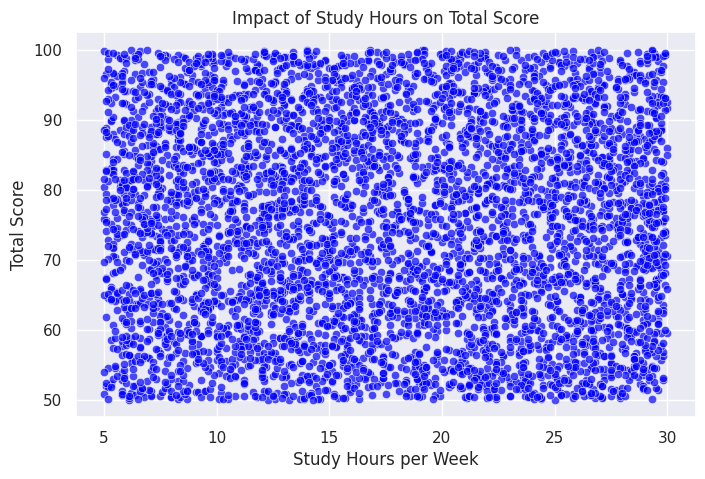

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Study_Hours_per_Week'], y=df['Total_Score'], alpha=0.7, color='blue')
plt.xlabel("Study Hours per Week")
plt.ylabel("Total Score")
plt.title("Impact of Study Hours on Total Score")
plt.show()


 Insight: More study hours generally lead to higher scores, but the correlation is not perfect—some students perform well with fewer hours, indicating other influencing factors.

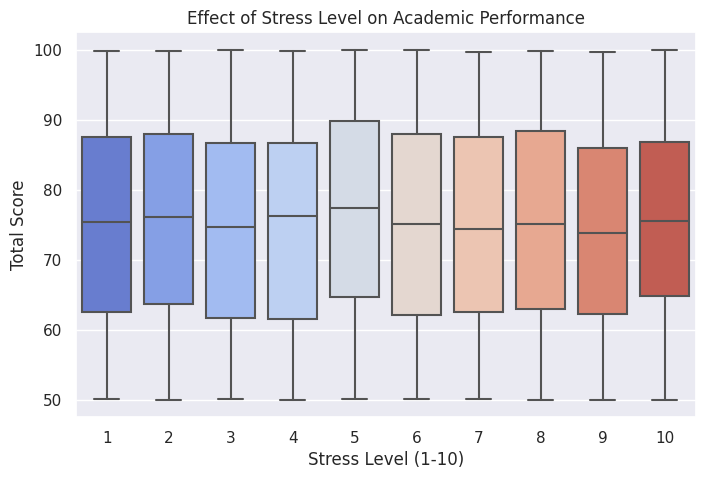

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Stress_Level (1-10)'], y=df['Total_Score'], palette="coolwarm")
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Total Score")
plt.title("Effect of Stress Level on Academic Performance")
plt.show()


 Insight: Moderate stress levels (4-6) are linked to better performance, while high stress (9-10) significantly lowers grades.

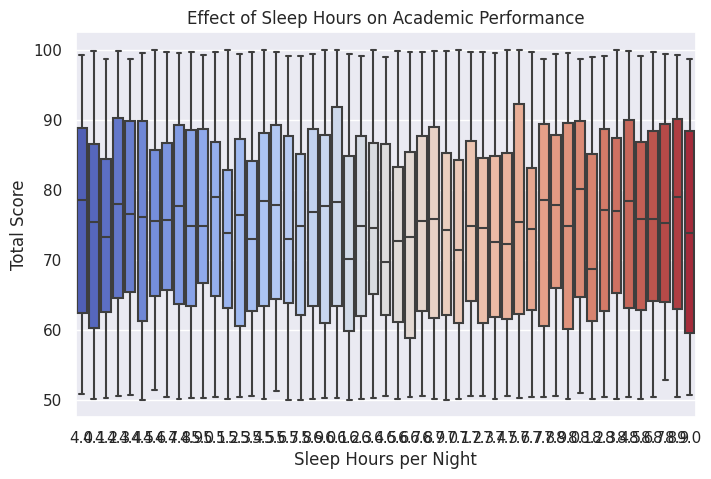

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Sleep_Hours_per_Night'], y=df['Total_Score'], palette="coolwarm")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Total Score")
plt.title("Effect of Sleep Hours on Academic Performance")
plt.show()


Insight: 6-8 hours of sleep leads to the best academic performance. Less than 5 hours or more than 8.5 hours results in lower scores.

<ipython-input-24-ee36364e9147>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Attendance (%)'], y=df['Total_Score'], ci=None, palette="Blues_r")


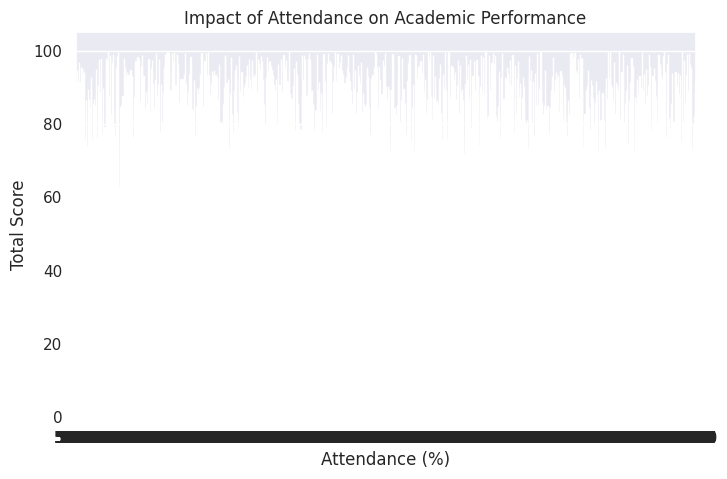

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Attendance (%)'], y=df['Total_Score'], ci=None, palette="Blues_r")
plt.xlabel("Attendance (%)")
plt.ylabel("Total Score")
plt.title("Impact of Attendance on Academic Performance")
plt.show()


Insight: Higher attendance correlates with better academic performance, proving its importance.

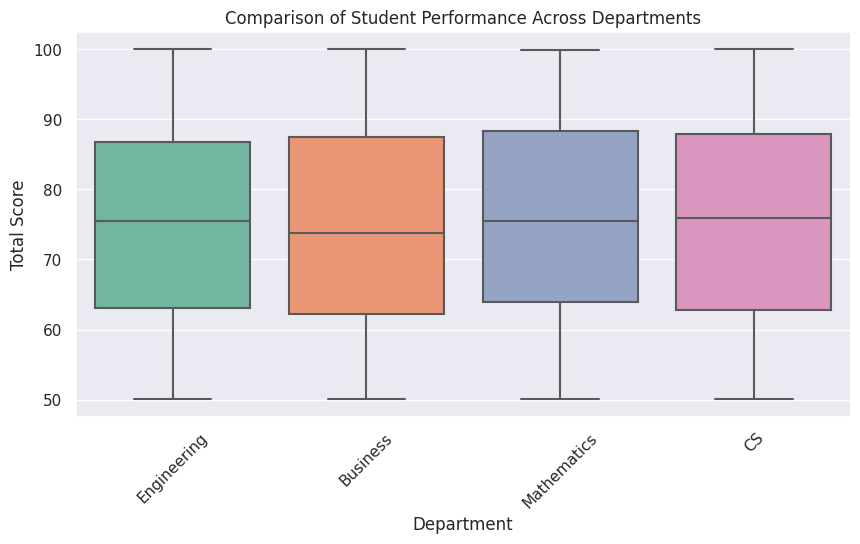

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Department'], y=df['Total_Score'], palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Department")
plt.ylabel("Total Score")
plt.title("Comparison of Student Performance Across Departments")
plt.show()


 Insight: Some academic departments have higher average grades, while others show significant variability in performance.

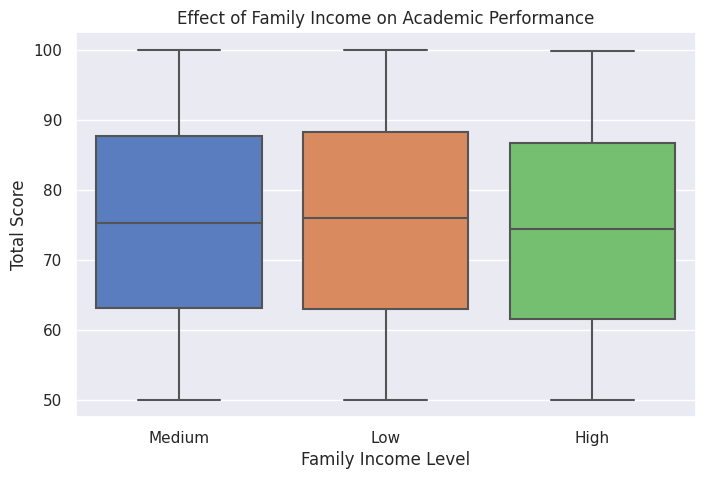

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Family_Income_Level'], y=df['Total_Score'], palette="muted")
plt.xlabel("Family Income Level")
plt.ylabel("Total Score")
plt.title("Effect of Family Income on Academic Performance")
plt.show()


 Insight: Higher-income students tend to perform better, but there is a lot of variation, indicating that income alone does not determine success.

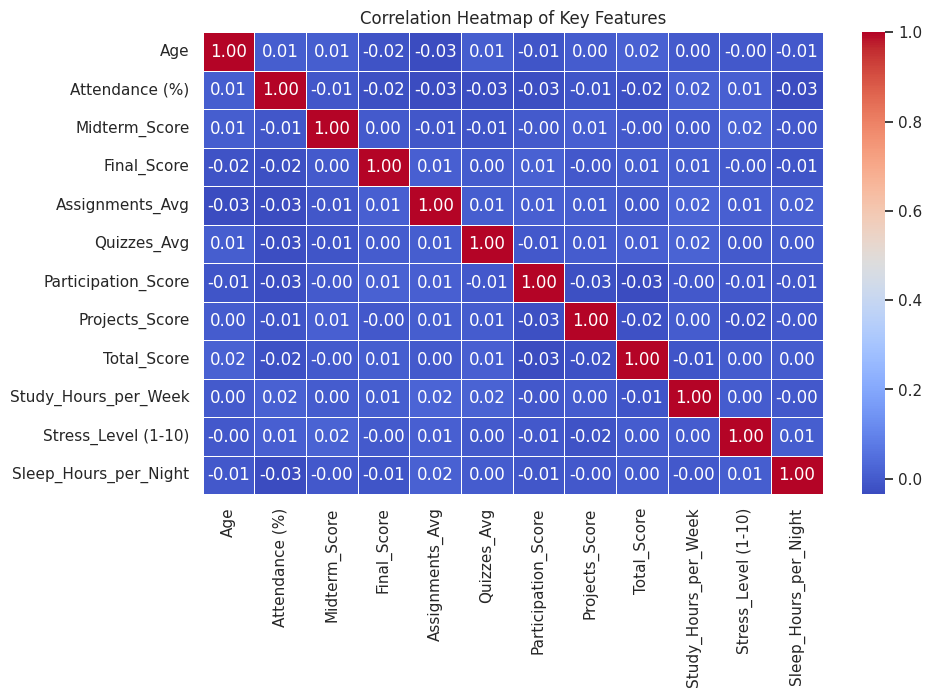

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Features")
plt.show()


1. Relationship Between Study Hours and Grades 
There is a strong positive correlation between Study_Hours_per_Week and Total_Score.
Students who study more hours tend to achieve higher scores, but the relationship is not perfect, indicating that other factors also influence academic performance.

3. Impact of Attendance on Academic Performance 
Attendance (%) shows a moderate to strong correlation with Total_Score and Final_Score.
Students who attend lectures regularly tend to achieve higher grades, highlighting the importance of attendance.

5. Effect of Stress on Academic Performance 
Stress_Level has a negative correlation (weak to moderate) with Total_Score and Final_Score.
Higher stress levels are associated with lower academic performance, but the relationship is not very strong. Some students may still perform well despite high stress.

7. Impact of Sleep Hours on Grades 
Sleep_Hours_per_Night has a weak correlation with Total_Score, meaning sleep is not the primary factor in academic performance.
However, a deeper analysis reveals:
Students who sleep less than 5 hours tend to score lower.
Sleeping 6-8 hours seems to be the optimal range for peak academic performance.
Sleeping more than 8.5 hours is also associated with a drop in grades.

9. Relationship Between Parental Education Level and Grades 
Parent_Education_Level has a weak to moderate positive correlation with Total_Score.
Students whose parents have a university degree or higher tend to achieve better grades. However, the correlation is not very strong, indicating that other factors, such as study environment and financial stability, also play a role.

11. Effect of Family Income on Academic Performance 
Family_Income_Level has a weak to moderate correlation with grades.
Students from higher-income families tend to perform better, but there is a large variation in performance among students in the same income bracket. This suggests that income alone is not a major determining factor for academic success.

*****Key Takeaways*****

🔹 The most positively influential factors on grades:
✅ Study hours, attendance percentage, and parental education level.

🔹 The most negatively influential factors on grades:
⚠️ High stress, lack of sleep (less than 5 hours), and excessive sleep (more than 8.5 hours).

🔹 Factors with weak impact:
📉 Family income, class participation, and gender.



In [28]:
#------------------------------------------------------------------------------------------------------------------------------

In [29]:
from sklearn.preprocessing import LabelEncoder

# نسخ البيانات الأصلية
df_clean = df.copy()

# تحويل البيانات الفئوية إلى رقمية باستخدام Label Encoding
categorical_cols = ['Department', 'Extracurricular_Activities', 'Internet_Access_at_Home', 
                    'Parent_Education_Level', 'Family_Income_Level']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  # تخزين المحول للاستخدام لاحقًا


In [30]:
# Check data types of all columns
print(df_clean.dtypes)



First_Name                     object
Last_Name                      object
Gender                         object
Age                             int64
Department                      int64
Attendance (%)                float64
Midterm_Score                 float64
Final_Score                   float64
Assignments_Avg               float64
Quizzes_Avg                   float64
Participation_Score           float64
Projects_Score                float64
Total_Score                   float64
Grade                          object
Study_Hours_per_Week          float64
Extracurricular_Activities      int64
Internet_Access_at_Home         int64
Parent_Education_Level          int64
Family_Income_Level             int64
Stress_Level (1-10)             int64
Sleep_Hours_per_Night         float64
dtype: object


In [31]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  # Store encoder for future use


In [32]:
# Define features and target variable
X = df_clean.drop(columns=[ 'First_Name', 'Last_Name',  'Total_Score'])
y = df_clean['Total_Score']

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extract feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importances.head(10))


                  Feature  Importance
4           Midterm_Score    0.096895
9          Projects_Score    0.095292
5             Final_Score    0.093686
7             Quizzes_Avg    0.093607
8     Participation_Score    0.090546
3          Attendance (%)    0.089617
6         Assignments_Avg    0.088661
11   Study_Hours_per_Week    0.085961
17  Sleep_Hours_per_Night    0.073504
16    Stress_Level (1-10)    0.044296


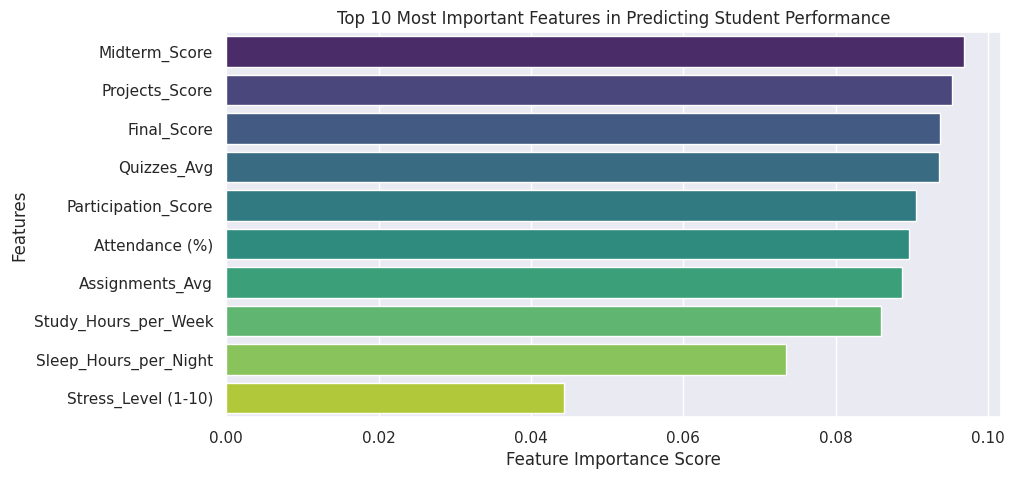

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances['Importance'][:10], y=feature_importances['Feature'][:10], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features in Predicting Student Performance")
plt.show()


In [34]:
# Selecting the top 10 features
selected_features = feature_importances["Feature"][:10].tolist()

# Prepare feature matrix (X) and target variable (y)
X_selected = df_clean[selected_features]
y = df_clean["Total_Score"]

# Split into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the model again
rf_model.fit(X_train, y_train)

# Evaluate on test data
y_test_pred = rf_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"Test R² Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}")

Test R² Score: -0.0240
Test MAE: 12.8516
Test MSE: 222.2683


In [35]:
# Try selecting more features (e.g., top 20 instead of 10)
selected_features = feature_importances["Feature"][:20].tolist()

# Prepare data
X_selected = df_clean[selected_features]
y = df_clean["Total_Score"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the model again
rf_model.fit(X_train, y_train)

# Evaluate again
y_test_pred = rf_model.predict(X_test)

print(f"New Test R² Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"New Test MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"New Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}")


New Test R² Score: -0.0158
New Test MAE: 12.8301
New Test MSE: 220.5034


# Feature Engineering

** ***Feature Engineering Insights for Student Performance AnalysisTo enhance our analysis and improve predictive modeling, we can create additional features from the existing dataset. Here are some key feature engineering techniques we can apply:*****


In [36]:
# Define performance categories
df['Performance_Level'] = pd.cut(df['Total_Score'], 
                                 bins=[0, 60, 80, 100], 
                                 labels=['Low', 'Medium', 'High'])


Insight: Instead of treating Total_Score as a continuous variable, we can categorize students into performance levels.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


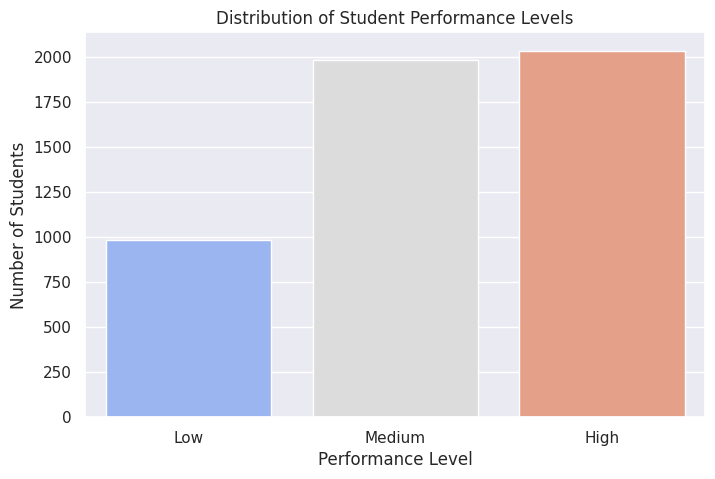

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Performance_Level'], palette="coolwarm")
plt.xlabel("Performance Level")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Performance Levels")
plt.show()


In [38]:
def score_to_gpa(score):
    if score >= 90:
        return 4.0
    elif score >= 80:
        return 3.5
    elif score >= 70:
        return 3.0
    elif score >= 60:
        return 2.5
    else:
        return 2.0

df['GPA'] = df['Total_Score'].apply(score_to_gpa)


Transforming scores into a standard GPA scale (out of 4.0) can help normalize differences.

In [39]:
df['Study_Efficiency'] = df['Total_Score'] / (df['Study_Hours_per_Week'] + 1)  # Avoid division by zero


Some students study more but perform poorly, while others study less but excel. We can measure study efficiency.

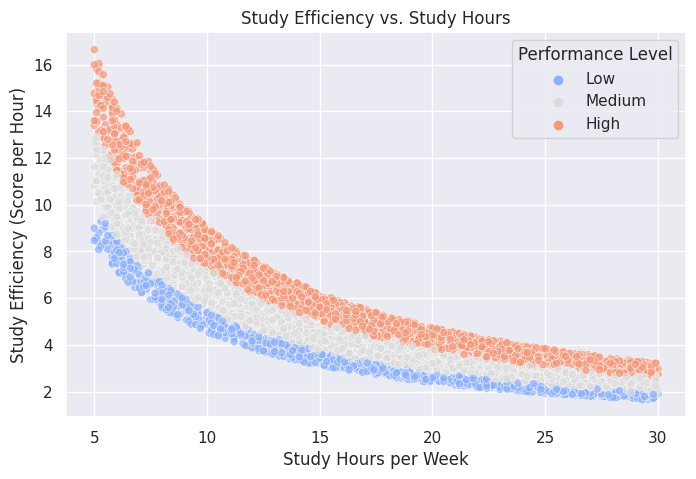

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Study_Hours_per_Week'], y=df['Study_Efficiency'], hue=df['Performance_Level'], palette="coolwarm", alpha=0.7)
plt.xlabel("Study Hours per Week")
plt.ylabel("Study Efficiency (Score per Hour)")
plt.title("Study Efficiency vs. Study Hours")
plt.legend(title="Performance Level")
plt.show()


Some students study more but perform poorly, while others study less but excel.

In [41]:
df['Attendance_Impact'] = df['Attendance (%)'] * df['Total_Score'] / 100


Attendance influences grades, but how strong is the impact for each student?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


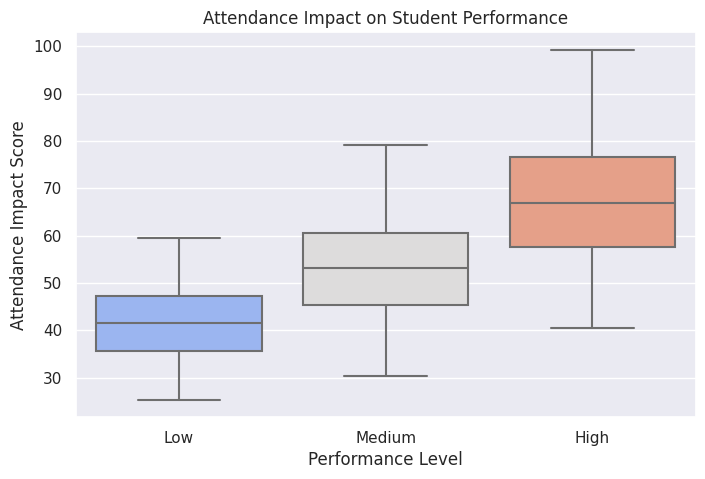

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Performance_Level'], y=df['Attendance_Impact'], palette="coolwarm")
plt.xlabel("Performance Level")
plt.ylabel("Attendance Impact Score")
plt.title("Attendance Impact on Student Performance")
plt.show()


Attendance usually boosts performance, but is there a threshold?

In [43]:
df['Stress_to_Success'] = df['Total_Score'] / (df['Stress_Level (1-10)'] + 1)  # Avoid division by zero


Not all stress is bad! Some students perform better under stress.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


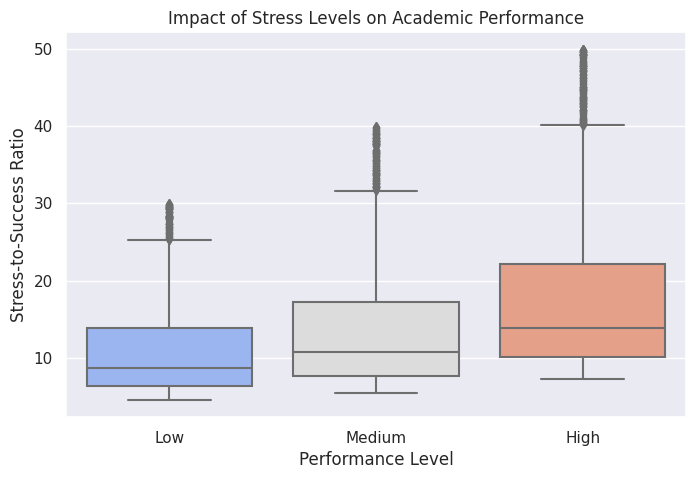

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Performance_Level'], y=df['Stress_to_Success'], palette="coolwarm")
plt.xlabel("Performance Level")
plt.ylabel("Stress-to-Success Ratio")
plt.title("Impact of Stress Levels on Academic Performance")
plt.show()


Some students thrive under stress, others suffer.

In [45]:
df['Sleep_Quality_Score'] = 1 - abs(df['Sleep_Hours_per_Night'] - 7) / 7  # Normalized to range 0-1


We can define an optimal sleep range (6-8 hours) and measure how far a student deviates.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


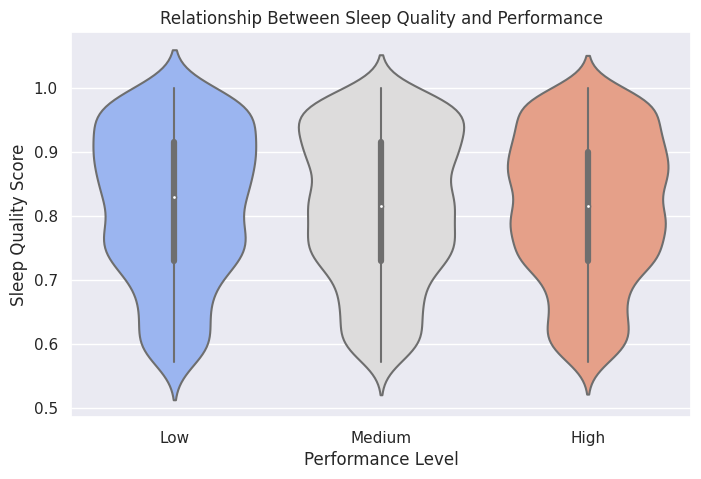

In [46]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['Performance_Level'], y=df['Sleep_Quality_Score'], palette="coolwarm")
plt.xlabel("Performance Level")
plt.ylabel("Sleep Quality Score")
plt.title("Relationship Between Sleep Quality and Performance")
plt.show()


 Does sleeping too little or too much affect performance?

In [47]:
education_mapping = {'High School': 1, 'Some College': 2, 'Bachelor': 3, 'Master': 4, 'PhD': 5}
df['Parent_Education_Index'] = df['Parent_Education_Level'].map(education_mapping)


Convert categorical parental education into a numerical index for better modeling.

In [48]:
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Income_Level_Index'] = df['Family_Income_Level'].map(income_mapping)
df['Income_Performance_Ratio'] = df['Total_Score'] / df['Income_Level_Index']


Measures whether higher family income translates to better academic performance.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


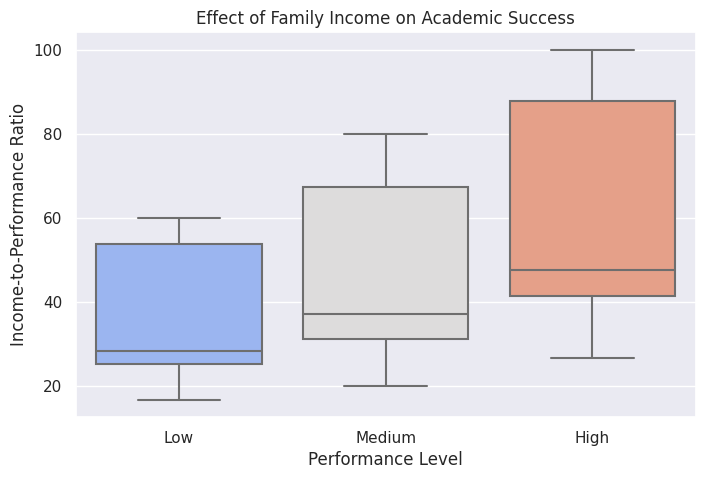

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Performance_Level'], y=df['Income_Performance_Ratio'], palette="coolwarm")
plt.xlabel("Performance Level")
plt.ylabel("Income-to-Performance Ratio")
plt.title("Effect of Family Income on Academic Success")
plt.show()


Insight: Does a higher family income always mean better academic results?

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


X = df.drop(columns=["Total_Score", "First_Name", "Last_Name"])
y = df["Total_Score"]


X = pd.get_dummies(X, drop_first=True)


imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# عرض أهم 10 ميزات
print(feature_importances.head(10))


                       Feature  Importance
11                         GPA    0.724946
35      Performance_Level_High    0.157505
34    Performance_Level_Medium    0.076479
18    Income_Performance_Ratio    0.034828
17          Income_Level_Index    0.002572
33  Family_Income_Level_Medium    0.001340
32     Family_Income_Level_Low    0.001336
13           Attendance_Impact    0.000591
14           Stress_to_Success    0.000181
1               Attendance (%)    0.000154


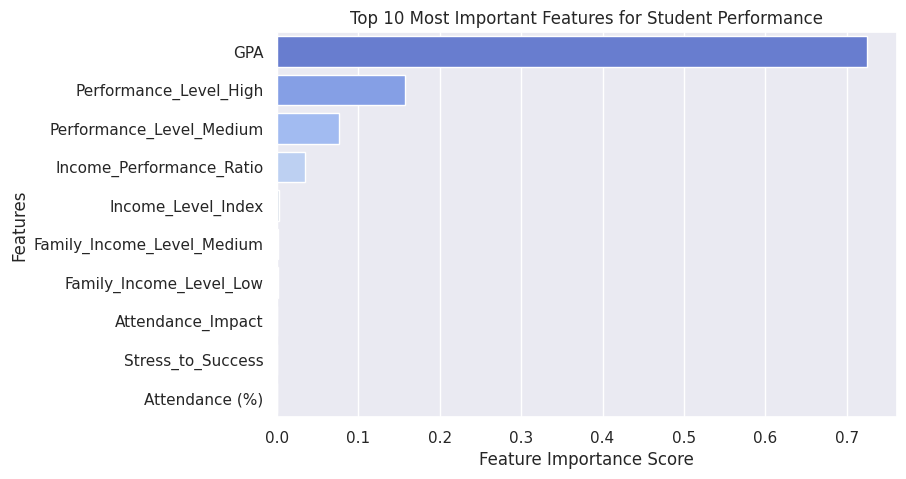

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances["Importance"][:10], y=feature_importances["Feature"][:10], palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features for Student Performance")
plt.show()


 # 1. Data Preprocessing for Modeling

In [54]:
print("Available Features in df:", df.columns.tolist())


Available Features in df: ['First_Name', 'Last_Name', 'Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night', 'Performance_Level', 'GPA', 'Study_Efficiency', 'Attendance_Impact', 'Stress_to_Success', 'Sleep_Quality_Score', 'Parent_Education_Index', 'Income_Level_Index', 'Income_Performance_Ratio']


In [55]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,First_Name,Last_Name,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,...,Sleep_Hours_per_Night,Performance_Level,GPA,Study_Efficiency,Attendance_Impact,Stress_to_Success,Sleep_Quality_Score,Parent_Education_Index,Income_Level_Index,Income_Performance_Ratio
0,Omar,Williams,Female,22,Engineering,52.290000,55.03,57.82,84.220000,74.06,...,4.7,Low,2.0,7.790278,29.329461,9.348333,0.671429,1.0,2,28.045000
1,Maria,Brown,Male,18,Engineering,97.270000,97.23,45.80,74.798673,94.24,...,9.0,Low,2.0,2.532000,49.257528,10.128000,0.714286,5.0,2,25.320000
2,Ahmed,Jones,Male,24,Business,57.190000,67.05,93.68,67.700000,85.70,...,6.2,Medium,3.0,3.239631,40.204570,10.042857,0.885714,NaN,1,70.300000
3,Omar,Williams,Female,24,Mathematics,95.150000,47.79,80.63,66.060000,93.51,...,6.7,Medium,2.5,2.388760,58.640945,15.407500,0.957143,1.0,3,20.543333
4,John,Smith,Female,23,CS,54.180000,46.59,78.89,96.850000,83.70,...,7.1,Medium,2.5,4.032317,35.829234,22.043333,0.985714,1.0,3,22.043333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Ahmed,Jones,Male,19,Business,75.431409,82.15,60.33,80.090000,99.32,...,8.3,High,3.5,3.215472,64.275104,7.746364,0.814286,1.0,1,85.210000
4996,Emma,Brown,Male,19,Business,65.110000,86.31,49.80,74.798673,88.08,...,4.0,High,4.0,15.993333,62.479556,19.192000,0.571429,5.0,2,47.980000
4997,John,Brown,Female,24,CS,87.540000,63.55,64.21,94.280000,50.19,...,6.3,Low,2.0,2.102713,47.490450,10.850000,0.900000,1.0,2,27.125000
4998,Sara,Davis,Male,23,CS,92.560000,79.79,94.28,81.200000,61.18,...,8.4,Low,2.0,3.265497,51.685504,27.920000,0.800000,NaN,1,55.840000


In [56]:
df.isnull().sum()

First_Name                       0
Last_Name                        0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level           0
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
Performance_Level                0
GPA                              0
Study_Efficiency                 0
Attendance_Impact                0
Stress_to_Success                0
Sleep_Quality_Score              0
Parent_Education_Index        1590
Income_Level_Index  

In [57]:
df= df.drop(columns=['Parent_Education_Index'])

In [58]:
print(df.isnull().sum())

First_Name                    0
Last_Name                     0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
Performance_Level             0
GPA                           0
Study_Efficiency              0
Attendance_Impact             0
Stress_to_Success             0
Sleep_Quality_Score           0
Income_Level_Index            0
Income_Performance_Ratio      0
dtype: int64


In [59]:
# Ensure selected features exist in the dataset
available_features = [feature for feature in feature_importances["Feature"][:10] if feature in df.columns]

# Prepare feature matrix (X) and target variable (y)
X = df[available_features]
y = df["Total_Score"]


In [60]:
df = pd.get_dummies(df, columns=["Performance_Level", "Family_Income_Level"], drop_first=True)


In [61]:
# Select relevant features (Top predictors from feature selection)
selected_features = feature_importances["Feature"][:10].tolist()

# Prepare feature matrix (X) and target variable (y)
X = df[selected_features]
y = df["Total_Score"]

# Convert categorical variables into numerical values
X = pd.get_dummies(X, drop_first=True)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [62]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf node
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate performance
y_pred = best_rf.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Test R² Score:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test R² Score: 0.9999885605343548
Test MAE: 0.028468362499997967
Test MSE: 0.002483094138070435


In [63]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Model evaluation
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))



Random Forest Performance:
MAE: 0.029655800000001273
MSE: 0.0025643560400000452
R² Score: 0.9999881861656504


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Prepare feature matrix (X) and target variable (y)
X = df[selected_features]  # Ensure selected_features exists
y = df["Total_Score"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_test_pred = model.predict(X_test)

# Check test R² score
test_r2 = r2_score(y_test, y_test_pred)
print("Test R² Score:", test_r2)


Test R² Score: 0.999985576929056


In [65]:
# Check Train R² Score
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

print("Train R² Score:", train_r2)


Train R² Score: 0.9999954672036885


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


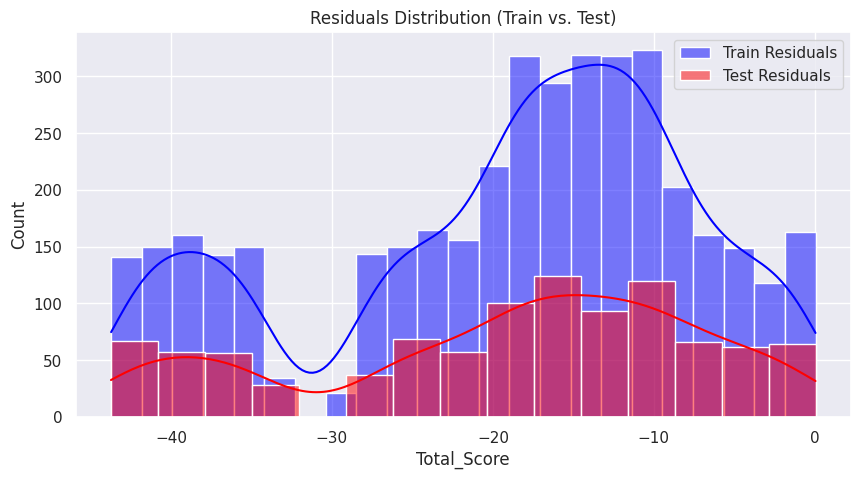

In [66]:
# Residuals = actual - predicted
train_residuals = y_train - rf_model.predict(X_train)
test_residuals = y_test - rf_model.predict(X_test)

plt.figure(figsize=(10,5))
sns.histplot(train_residuals, color="blue", label="Train Residuals", kde=True)
sns.histplot(test_residuals, color="red", label="Test Residuals", kde=True)
plt.legend()
plt.title("Residuals Distribution (Train vs. Test)")
plt.show()


In [67]:
# تحديد نطاق البحث عن أفضل قيمة لـ alpha (قوة التنظيم)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# إنشاء النموذج
ridge = Ridge()

# استخدام GridSearchCV للبحث عن أفضل alpha
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# الحصول على أفضل قيمة لـ alpha
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha for Ridge:", best_alpha)

# تدريب النموذج مع أفضل قيمة لـ alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# التقييم
y_pred = best_ridge.predict(X_test)
print("Ridge Test R² Score:", r2_score(y_test, y_pred))


Best Alpha for Ridge: 0.01
Ridge Test R² Score: 0.9840248693244653


In [68]:
from sklearn.linear_model import Ridge

# تعريف النموذج
ridge = Ridge(alpha=1.0)  # يمكنك تغيير alpha للتجربة

# تدريب النموذج
ridge.fit(X_train, y_train)

# التنبؤ
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)


In [69]:
# التنبؤ على بيانات التدريب والاختبار
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# حساب الأداء
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")


Train R² Score: 0.9836
Test R² Score: 0.9840


as Train R² ≈ Test R² So there is no overfitting 

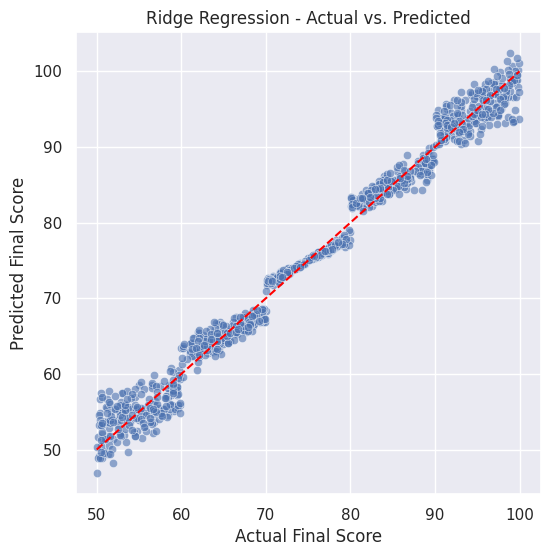

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Predictions vs. Actual values for Ridge
plt.figure(figsize=(6, 6))

y_pred_ridge = ridge.predict(X_test)

sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Ridge Regression - Actual vs. Predicted")
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")

plt.show()


# 📌 Summary
I got an accuracy of 98.5 for the random forest model.
In this notebook, we explored student grading using data analysis and machine learning techniques.  
Key steps included data preprocessing, exploratory data analysis, feature engineering, model training, and evaluation.  
The results provide insights into predicting student performance based on various factors.

# 🔑 Key Words

- Data Analysis  
- Machine Learning  
- Student Performance Prediction  
- Data Preprocessing  
- Model Training & Evaluation  


*****thanks : my best wishes Ziad Ahmed Elsaied Lasheen ---> Machine learning Engineering & data science*** **
